In [1]:
#TESTING FOR ANGER

In [2]:
import os
import sys
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from features import FeatureExtractor
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import pickle

data_dir = 'testing_data' 
class_names = []

data = np.zeros((0,8002))      
            
data_file = os.path.join(data_dir, 'speaker-data-anger-3.csv')
data = np.genfromtxt(data_file, delimiter=',')
print("Loaded {} raw labelled audio data samples.".format(len(data)))
sys.stdout.flush()

n_features = 1031

print("Extracting features and labels for {} audio windows...".format(data.shape[0]))
sys.stdout.flush()

X = np.zeros((0,n_features))
y = np.zeros(0,)

feature_extractor = FeatureExtractor(debug=False) 

nr_total_windows = 0
nr_bad_windows = 0
nr_windows_with_zeros = 0

for i,window_with_timestamp_and_label in enumerate(data):
    window = window_with_timestamp_and_label[1:-1]
    label = data[i,-1]
    nr_total_windows += 1
    try:
        x = feature_extractor.extract_features(window)
        if (len(x) != X.shape[1]):
            print("Received feature vector of length {}. Expected feature vector of length {}.".format(len(x), X.shape[1]))
        X = np.append(X, np.reshape(x, (1,-1)), axis=0)
        y = np.append(y, label)
    except KeyError as e:
        print(e)
        nr_bad_windows += 1
        if np.all((window == 0)):
            nr_windows_with_zeros += 1
print("{} windows found".format(nr_total_windows))
print("{} bad windows found, with {} windows with only zeros".format(nr_bad_windows, nr_windows_with_zeros))
    
print("Finished feature extraction over {} windows".format(len(X)))
print("Unique labels found: {}".format(set(y)))
sys.stdout.flush()

Loaded 16 raw labelled audio data samples.
Extracting features and labels for 16 audio windows...


C:\Users\harsh\final_project\features.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.mean(np.fft.fft(window, axis = 0).astype(float))


16 windows found
0 bad windows found, with 0 windows with only zeros
Finished feature extraction over 16 windows
Unique labels found: {3.0}


In [3]:
loaded_model = pickle.load(open('training_output/classifier.pickle', 'rb'))
result = loaded_model.score(X, y)
prediction = loaded_model.predict(X)

import librosa
audio_data = 'speaker-data-anger-3.wav'
x , sr = librosa.load(audio_data)
y = librosa.load(audio_data, sr=44100)

import IPython.display as ipd
ipd.Audio(audio_data)

In [4]:
from collections import Counter
final_pred = Counter(prediction)
lst = []
lst.append(final_pred[0])
lst.append(final_pred[1])
lst.append(final_pred[2])
val = lst.index(max(lst))
if val == 0:
    print("The speaker is Angry")
elif val == 1:
    print("The speaker is Happy")
elif val == 2:
    print("The speaker is Sad")

The speaker is Angry


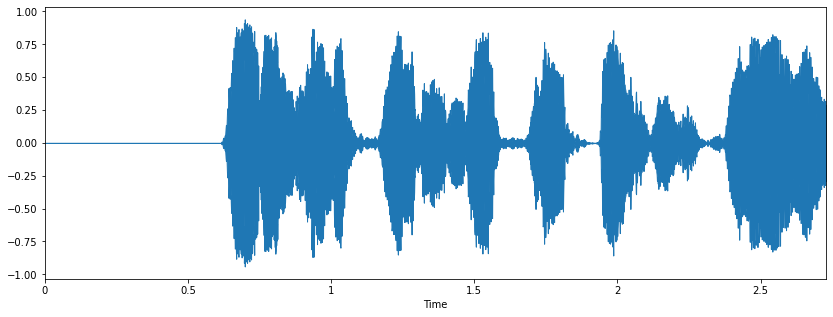

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [6]:
#TESTING FOR SAD

In [7]:
data_dir = 'testing_data' 
class_names = []

data = np.zeros((0,8002))      
            
data_file = os.path.join(data_dir, 'speaker-data-sad-3.csv')
data = np.genfromtxt(data_file, delimiter=',')
print("Loaded {} raw labelled audio data samples.".format(len(data)))
sys.stdout.flush()

n_features = 1031

print("Extracting features and labels for {} audio windows...".format(data.shape[0]))
sys.stdout.flush()

X = np.zeros((0,n_features))
y = np.zeros(0,)

feature_extractor = FeatureExtractor(debug=False) 

nr_total_windows = 0
nr_bad_windows = 0
nr_windows_with_zeros = 0

for i,window_with_timestamp_and_label in enumerate(data):
    window = window_with_timestamp_and_label[1:-1]
    label = data[i,-1]
    nr_total_windows += 1
    try:
        x = feature_extractor.extract_features(window)
        if (len(x) != X.shape[1]):
            print("Received feature vector of length {}. Expected feature vector of length {}.".format(len(x), X.shape[1]))
        X = np.append(X, np.reshape(x, (1,-1)), axis=0)
        y = np.append(y, label)
    except KeyError as e:
        print(e)
        nr_bad_windows += 1
        if np.all((window == 0)):
            nr_windows_with_zeros += 1
print("{} windows found".format(nr_total_windows))
print("{} bad windows found, with {} windows with only zeros".format(nr_bad_windows, nr_windows_with_zeros))
    
print("Finished feature extraction over {} windows".format(len(X)))
print("Unique labels found: {}".format(set(y)))
sys.stdout.flush()

Loaded 17 raw labelled audio data samples.
Extracting features and labels for 17 audio windows...


C:\Users\harsh\final_project\features.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.mean(np.fft.fft(window, axis = 0).astype(float))


17 windows found
0 bad windows found, with 0 windows with only zeros
Finished feature extraction over 17 windows
Unique labels found: {3.0}


In [8]:
loaded_model = pickle.load(open('training_output/classifier.pickle', 'rb'))
result = loaded_model.score(X, y)
prediction = loaded_model.predict(X)

import librosa
audio_data = 'speaker-data-sad-3.wav'
x , sr = librosa.load(audio_data)
y = librosa.load(audio_data, sr=44100)

import IPython.display as ipd
ipd.Audio(audio_data)

In [9]:
from collections import Counter
final_pred = Counter(prediction)
lst = []
lst.append(final_pred[0])
lst.append(final_pred[1])
lst.append(final_pred[2])
val = lst.index(max(lst))
if val == 0:
    print("The speaker is Angry")
elif val == 1:
    print("The speaker is Happy")
elif val == 2:
    print("The speaker is Sad")

The speaker is Sad


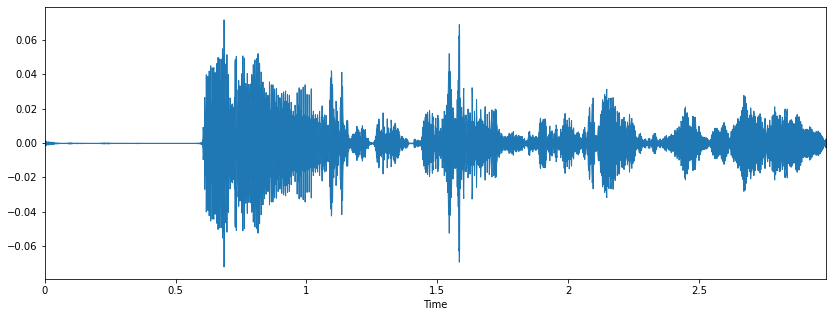

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [11]:
#TESTING FOR HAPPY

In [12]:
data_dir = 'testing_data' 
class_names = []

data = np.zeros((0,8002))      
            
data_file = os.path.join(data_dir, 'speaker-data-happy-3.csv')
data = np.genfromtxt(data_file, delimiter=',')
print("Loaded {} raw labelled audio data samples.".format(len(data)))
sys.stdout.flush()

n_features = 1031

print("Extracting features and labels for {} audio windows...".format(data.shape[0]))
sys.stdout.flush()

X = np.zeros((0,n_features))
y = np.zeros(0,)

feature_extractor = FeatureExtractor(debug=False) 

nr_total_windows = 0
nr_bad_windows = 0
nr_windows_with_zeros = 0

for i,window_with_timestamp_and_label in enumerate(data):
    window = window_with_timestamp_and_label[1:-1]
    label = data[i,-1]
    nr_total_windows += 1
    try:
        x = feature_extractor.extract_features(window)
        if (len(x) != X.shape[1]):
            print("Received feature vector of length {}. Expected feature vector of length {}.".format(len(x), X.shape[1]))
        X = np.append(X, np.reshape(x, (1,-1)), axis=0)
        y = np.append(y, label)
    except KeyError as e:
        print(e)
        nr_bad_windows += 1
        if np.all((window == 0)):
            nr_windows_with_zeros += 1
print("{} windows found".format(nr_total_windows))
print("{} bad windows found, with {} windows with only zeros".format(nr_bad_windows, nr_windows_with_zeros))
    
print("Finished feature extraction over {} windows".format(len(X)))
print("Unique labels found: {}".format(set(y)))
sys.stdout.flush()

Loaded 18 raw labelled audio data samples.
Extracting features and labels for 18 audio windows...


C:\Users\harsh\final_project\features.py:71: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.mean(np.fft.fft(window, axis = 0).astype(float))


18 windows found
0 bad windows found, with 0 windows with only zeros
Finished feature extraction over 18 windows
Unique labels found: {3.0}


In [13]:
loaded_model = pickle.load(open('training_output/classifier.pickle', 'rb'))
result = loaded_model.score(X, y)
prediction = loaded_model.predict(X)

import librosa
audio_data = 'speaker-data-happy-3.wav'
x , sr = librosa.load(audio_data)
y = librosa.load(audio_data, sr=44100)

import IPython.display as ipd
ipd.Audio(audio_data)

In [14]:
from collections import Counter
final_pred = Counter(prediction)
lst = []
lst.append(final_pred[0])
lst.append(final_pred[1])
lst.append(final_pred[2])
val = lst.index(max(lst))
if val == 0:
    print("The speaker is Angry")
elif val == 1:
    print("The speaker is Happy")
elif val == 2:
    print("The speaker is Sad")

The speaker is Happy


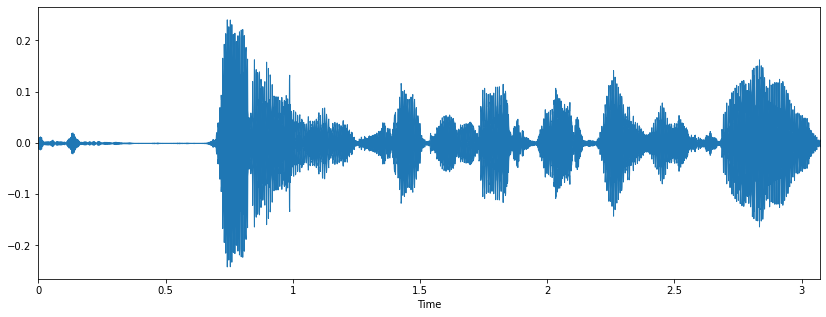

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)